In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [2]:
np.random.seed(0)
X = np.random.rand(100, 1) * 2 - 1  # [-1, 1]
y = 5 * X**3 + 0.5 * X**2 + X + 0.2 + np.random.randn(100, 1) * 0.1  # Cubic + noise

In [3]:
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size= 0.2 , random_state=42 )

In [4]:
# 🔹 Degree 15 polynomial model (overfitting risk)
degree = 15

In [5]:
lr = make_pipeline(PolynomialFeatures(degree) , LinearRegression())
lr.fit(X_train , y_train)

Lasso = make_pipeline(PolynomialFeatures(degree) , Lasso(alpha=1.0))
Lasso.fit(X_train , y_train)

Ridge = make_pipeline(PolynomialFeatures(degree) , Ridge(alpha=1.0))
Ridge.fit(X_train , y_train)




Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('ridge', Ridge())])

In [7]:
print("Linear mse :" , mean_squared_error(y_test , lr.predict(X_test)))
print("Lasso mse :" ,mean_squared_error(y_test , Lasso.predict(X_test)))
print ("Ridge mse:", mean_squared_error(y_test , Ridge.predict(X_test)))

Linear mse : 0.012535630586548076
Lasso mse : 1.4706405332501986
Ridge mse: 0.038714138154941694


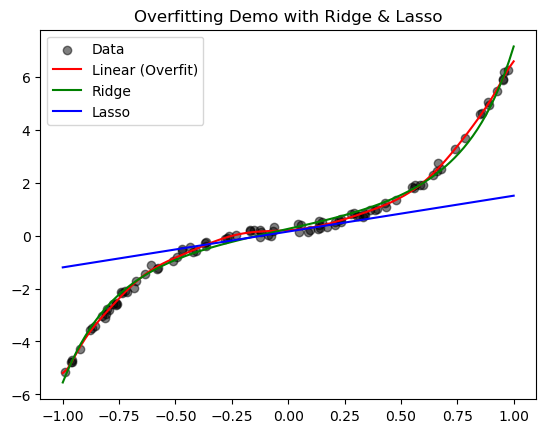

In [9]:
X_plot = np.linspace(-1, 1, 100).reshape(-1, 1)
plt.scatter(X, y, color='black', label='Data', alpha=0.5)
plt.plot(X_plot, lr.predict(X_plot), label='Linear (Overfit)', color='red')
plt.plot(X_plot, Ridge.predict(X_plot), label='Ridge', color='green')
plt.plot(X_plot, Lasso.predict(X_plot), label='Lasso', color='blue')
plt.legend()
plt.title("Overfitting Demo with Ridge & Lasso")
plt.show()